Load packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Set style of seaborn plots

In [2]:
sns.set(style="darkgrid")

Read in the data

In [3]:
gifts = pd.read_csv("data/gifts.txt", sep='\t', parse_dates=['date'])
donors = pd.read_csv("data/donors.txt", sep='\t')
gifts.head()

,transaction_id,donor_id,date,amount,campaign
0,1,950,2006-07-10,72,campaign 10
1,2,420,2006-04-07,64,campaign 2
2,3,1673,2006-02-20,46,campaign 5
3,4,1649,2008-04-10,24,campaign 3
4,5,77,2008-04-04,90,campaign 1


In [4]:
donors.head()

,donor_id,name,gender
0,1,OBZRH,F
1,2,PTEOM,M
2,3,BELFL,F
3,4,PSMKA,F
4,5,LKDJJ,M


Left join of the data

In [5]:
df = pd.merge(gifts, donors, how='left', on=['donor_id'])
df['year'] = df['date'].dt.year
df.dtypes

transaction_id             int64
donor_id                   int64
date              datetime64[ns]
amount                     int64
campaign                  object
name                      object
gender                    object
year                       int64
dtype: object

Aggregate by year and campaign, and make line plot

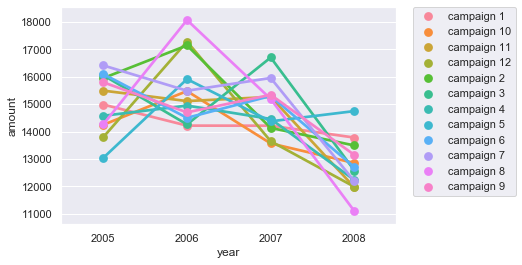

In [6]:
groupby_year_campaign = df.groupby(['year','campaign'])
sum_year_campaign = groupby_year_campaign[['amount']].sum().reset_index()
plot1 = sns.pointplot(x = 'year', y = 'amount', hue = 'campaign', 
                      data = sum_year_campaign)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Aggregate by gender and campaign, and make bar plot

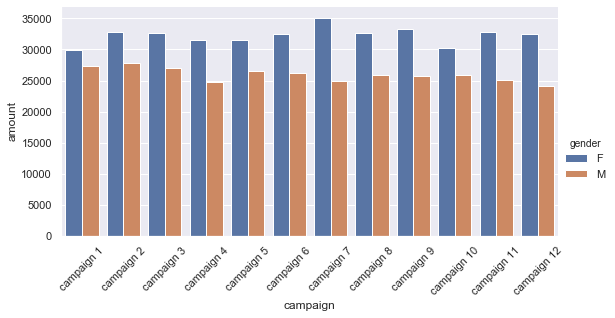

In [7]:
groupby_gender_campaign = df.groupby(['gender','campaign'])
sum_gender_campaign = groupby_gender_campaign[['amount']].sum().reset_index()
plot2 = sns.catplot(x = 'campaign', y = 'amount', hue = 'gender', 
                    data=sum_gender_campaign, kind='bar', height=4, aspect=2,
                    order = ['campaign '+ str(x) for x in list(range(1, 13))])
plot2.set_xticklabels(rotation=45)
sum_gender_campaign

plt.show()